<a href="https://colab.research.google.com/github/ducanhdang06/bone_marrow_ml/blob/main/BoneMarrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from matplotlib import pyplot

def print_4_metrics(target_test, predicted):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))

def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


In [ ]:
# Data Preparation

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1-u7q9mxS6UptXMP_2bCVwGDw0f9AVyq8", names = ["Recipientgender {1,0}", "Stemcellsource {1,0}",
"Donorage numeric",
 "Donorage35 {0,1}",
 "IIIV {1,0}",
 "Gendermatch {0,1}",
 "DonorABO {1,-1,2,0}",
 "RecipientABO {1,-1,2,0}",
 "RecipientRh {1,0}",
 "ABOmatch {0,1}",
 "CMVstatus {3,2,1,0}",
 "DonorCMV {1,0}",
 "RecipientCMV {1,0}",
 "Disease {ALL,AML,chronic,nonmalignant,lymphoma}",
 "Riskgroup {1,0}",
 "Txpostrelapse {0,1}",
 "Diseasegroup {1,0}",
 "HLAmatch {0,1,3,2}",
 "HLAmismatch {0,1}",
 "Antigen {-1,1,0,2}",
 "Alel {-1,0,2,1,3}",
"HLAgrI {0,1,7,3,2,4,5}",
 "Recipientage numeric",
 "Recipientage10 {0,1}",
 "Recipientageint {0,1,2}",
 "Relapse {0,1}",
 "aGvHDIIIIV {0,1}",
 "extcGvHD {1,0}",
 "CD34kgx10d6 numeric",
 "CD3dCD34 numeric",
 "CD3dkgx10d8 numeric",
 "Rbodymass numeric",
 "ANCrecovery numeric",
 "PLTrecovery numeric",
 "time_to_aGvHD_III_IV numeric",
 "supervision_time numeric",
 "survival_status numeric"
])

df.head()

,"Recipientgender {1,0}","Stemcellsource {1,0}",Donorage numeric,"Donorage35 {0,1}","IIIV {1,0}","Gendermatch {0,1}","DonorABO {1,-1,2,0}","RecipientABO {1,-1,2,0}","RecipientRh {1,0}","ABOmatch {0,1}",...,"extcGvHD {1,0}",CD34kgx10d6 numeric,CD3dCD34 numeric,CD3dkgx10d8 numeric,Rbodymass numeric,ANCrecovery numeric,PLTrecovery numeric,time_to_aGvHD_III_IV numeric,supervision_time numeric,survival_status numeric
0,1,1,22.830137,0,1,0,1,1,1,0,...,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,...,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,...,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2,1,1,...,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Recipientgender {1,0}                            187 non-null    int64  
 1   Stemcellsource {1,0}                             187 non-null    int64  
 2   Donorage numeric                                 187 non-null    float64
 3   Donorage35 {0,1}                                 187 non-null    int64  
 4   IIIV {1,0}                                       187 non-null    int64  
 5   Gendermatch {0,1}                                187 non-null    int64  
 6   DonorABO {1,-1,2,0}                              187 non-null    int64  
 7   RecipientABO {1,-1,2,0}                          187 non-null    object 
 8   RecipientRh {1,0}                                187 non-null    object 
 9   ABOmatch {0,1}                  

In [ ]:
df = df.apply (pd.to_numeric, errors='coerce')


In [ ]:
df.dropna(subset = ["DonorABO {1,-1,2,0}", "RecipientABO {1,-1,2,0}", "Disease {ALL,AML,chronic,nonmalignant,lymphoma}"])

,"Recipientgender {1,0}","Stemcellsource {1,0}",Donorage numeric,"Donorage35 {0,1}","IIIV {1,0}","Gendermatch {0,1}","DonorABO {1,-1,2,0}","RecipientABO {1,-1,2,0}","RecipientRh {1,0}","ABOmatch {0,1}",...,"extcGvHD {1,0}",CD34kgx10d6 numeric,CD3dCD34 numeric,CD3dkgx10d8 numeric,Rbodymass numeric,ANCrecovery numeric,PLTrecovery numeric,time_to_aGvHD_III_IV numeric,supervision_time numeric,survival_status numeric


In [ ]:
# One-Hot Encoding
DonorABO = pd.get_dummies(df["DonorABO {1,-1,2,0}"], prefix = "DonorABO")
RecipientABO = pd.get_dummies(df["RecipientABO {1,-1,2,0}"], prefix = "RecipientABO")
Disease = pd.get_dummies(df["Disease {ALL,AML,chronic,nonmalignant,lymphoma}"], prefix = "Disease")

for x in DonorABO:
  df[x] = DonorABO[x]
for x in RecipientABO:
  df[x] = RecipientABO[x]
for x in Disease:
  df[x] = Disease[x]
df

,"Recipientgender {1,0}","Stemcellsource {1,0}",Donorage numeric,"Donorage35 {0,1}","IIIV {1,0}","Gendermatch {0,1}","DonorABO {1,-1,2,0}","RecipientABO {1,-1,2,0}","RecipientRh {1,0}","ABOmatch {0,1}",...,supervision_time numeric,survival_status numeric,DonorABO_-1,DonorABO_0,DonorABO_1,DonorABO_2,RecipientABO_-1.0,RecipientABO_0.0,RecipientABO_1.0,RecipientABO_2.0
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,999,0,0,0,1,0,0,0,1,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,163,1,1,0,0,0,1,0,0,0
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,435,1,1,0,0,0,1,0,0,0
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,53,1,0,0,1,0,0,0,0,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,2043,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1.0,0.0,0.0,...,385,1,0,0,1,0,0,0,1,0
183,0,1,22.895890,0,0,0,1,0.0,1.0,1.0,...,634,1,0,0,1,0,0,1,0,0
184,0,1,27.347945,0,1,0,1,-1.0,1.0,1.0,...,1895,0,0,0,1,0,1,0,0,0
185,1,1,27.780822,0,1,0,1,0.0,1.0,1.0,...,382,1,0,0,1,0,0,1,0,0


In [ ]:
df = df.drop(["DonorABO {1,-1,2,0}", "RecipientABO {1,-1,2,0}", "Disease {ALL,AML,chronic,nonmalignant,lymphoma}"], axis = 1)

In [ ]:
# Fill missing values with median
column_names = list(df)
for x in column_names:
  df[x] = df[x].fillna(df[x].notna().median())
df

,"Recipientgender {1,0}","Stemcellsource {1,0}",Donorage numeric,"Donorage35 {0,1}","IIIV {1,0}","Gendermatch {0,1}","RecipientRh {1,0}","ABOmatch {0,1}","CMVstatus {3,2,1,0}","DonorCMV {1,0}",...,supervision_time numeric,survival_status numeric,DonorABO_-1,DonorABO_0,DonorABO_1,DonorABO_2,RecipientABO_-1.0,RecipientABO_0.0,RecipientABO_1.0,RecipientABO_2.0
0,1,1,22.830137,0,1,0,1.0,0.0,3.0,1.0,...,999,0,0,0,1,0,0,0,1,0
1,1,0,23.342466,0,1,0,1.0,0.0,0.0,0.0,...,163,1,1,0,0,0,1,0,0,0
2,1,0,26.394521,0,1,0,1.0,0.0,2.0,0.0,...,435,1,1,0,0,0,1,0,0,0
3,0,0,39.684932,1,1,0,1.0,1.0,1.0,1.0,...,53,1,0,0,1,0,0,0,0,1
4,0,1,33.358904,0,0,0,0.0,1.0,0.0,0.0,...,2043,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,0.0,0.0,3.0,1.0,...,385,1,0,0,1,0,0,0,1,0
183,0,1,22.895890,0,0,0,1.0,1.0,2.0,0.0,...,634,1,0,0,1,0,0,1,0,0
184,0,1,27.347945,0,1,0,1.0,1.0,3.0,1.0,...,1895,0,0,0,1,0,1,0,0,0
185,1,1,27.780822,0,1,0,1.0,1.0,0.0,0.0,...,382,1,0,0,1,0,0,1,0,0


In [ ]:
# Feature Creation - Ratio of Donor Age and Recipient Age

df['age_ratio'] = df['Donorage numeric']/df['Recipientage numeric']


In [ ]:
# Separate labels from features
target = df["survival_status numeric"]
lst = list(df)
lst.remove("survival_status numeric")
features = df[lst]

# Scaling
features_scaled = StandardScaler().fit_transform(features)
features_scaled
#features: features_scaled
#target: target

array([[ 0.81831709,  0.53819622, -1.28998124, ...,  1.22202019,
        -0.27333614, -0.4393542 ],
       [ 0.81831709, -1.85805838, -1.22787834, ..., -0.81831709,
        -0.27333614,  0.00618219],
       [ 0.81831709, -1.85805838, -0.85791788, ..., -0.81831709,
        -0.27333614, -0.23046544],
       ...,
       [-1.22202019,  0.53819622, -0.74234683, ..., -0.81831709,
        -0.27333614, -0.40694924],
       [ 0.81831709,  0.53819622, -0.68987485, ..., -0.81831709,
        -0.27333614, -0.29831978],
       [ 0.81831709,  0.53819622,  2.67663232, ..., -0.81831709,
         3.65849906,  0.00774302]])

In [ ]:
features_scaled, features_scaled_test, target, target_test = train_test_split(features_scaled, target, test_size=0.3, random_state=100)

0    70
1    60
Name: survival_status numeric, dtype: int64

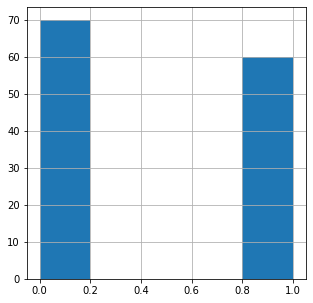

In [ ]:
#Check if data is balance
target.hist(bins = 5, figsize=(5,5))
target.value_counts()

# **2. Logistic Regression**

Here, we try to implement logistic regression to find out whether the patient dies (1) or lives (0) after bone marrow transplant surgery

Accuracy:    0.894737
Precision:   0.851852
Recall:      0.920000
F1 Score:    0.884615

AUC of ROC:
 0.9862500000000001


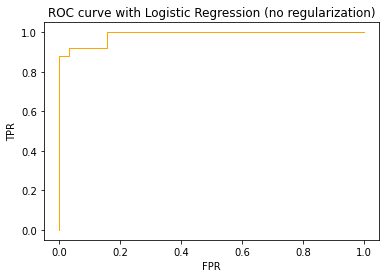

In [ ]:
# Logistic Regression with no regularization

log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(features_scaled, target)
prediction = log_reg.predict(features_scaled_test)

score = log_reg.predict_proba(features_scaled_test)[:,1]

print_4_metrics(target_test,prediction)

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
print()
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression (no regularization)")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)





In [ ]:
import math
import numpy as np

score=log_reg.predict_proba(features_scaled)[:,1]


fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target,score)

for x in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
  threshold = x
  print("----Threshold: " + str(threshold))
  predictions = np.where(log_reg.predict_proba(features_scaled)[:,1] > threshold, 1, 0)
  # print((1-fpr_log_reg[x])*tpr_log_reg[x])
  print_4_metrics(predictions, target)

----Threshold: 0.1
Accuracy:    0.846154
Precision:   1.000000
Recall:      0.750000
F1 Score:    0.857143
----Threshold: 0.15
Accuracy:    0.907692
Precision:   1.000000
Recall:      0.833333
F1 Score:    0.909091
----Threshold: 0.2
Accuracy:    0.923077
Precision:   1.000000
Recall:      0.857143
F1 Score:    0.923077
----Threshold: 0.25
Accuracy:    0.969231
Precision:   1.000000
Recall:      0.937500
F1 Score:    0.967742
----Threshold: 0.3
Accuracy:    0.976923
Precision:   1.000000
Recall:      0.952381
F1 Score:    0.975610
----Threshold: 0.35
Accuracy:    0.976923
Precision:   1.000000
Recall:      0.952381
F1 Score:    0.975610
----Threshold: 0.4
Accuracy:    0.976923
Precision:   1.000000
Recall:      0.952381
F1 Score:    0.975610
----Threshold: 0.45
Accuracy:    0.992308
Precision:   1.000000
Recall:      0.983607
F1 Score:    0.991736
----Threshold: 0.5
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.55
Accuracy:    

In [ ]:
import numpy as np
threshold = 0.625
predictions = np.where(log_reg.predict_proba(features_scaled_test)[:,1] > threshold, 1, 0)
print_4_metrics(predictions, target_test)

Accuracy:    0.929825
Precision:   0.920000
Recall:      0.920000
F1 Score:    0.920000


In [ ]:
lambda_list = [0.001,.01,.1,1, 2, 3, 4,5,6,7,8,9,10,100]
for lambd in lambda_list:
  print(lambd)
  log_reg = LogisticRegression(C=(1/lambd), penalty = 'l1', solver = 'liblinear')
  print(cross_val_score(log_reg, features_scaled, target, cv = 10).mean())

# Choose lambda 0.1

0.001
0.9230769230769231
0.01
0.9384615384615385
0.1
0.9461538461538461
1
0.9153846153846155
2
0.9153846153846155
3
0.8846153846153847
4
0.8615384615384617
5
0.8692307692307694
6
0.8461538461538461
7
0.8538461538461538
8
0.8538461538461538
9
0.8538461538461538
10
0.8384615384615385
100
0.5384615384615384


Accuracy:    0.947368
Precision:   0.958333
Recall:      0.920000
F1 Score:    0.938776

AUC of ROC:
 0.9925



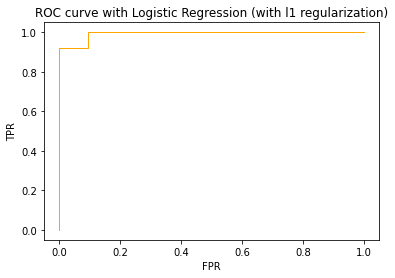

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.33, random_state = 30)
log_reg = LogisticRegression(C=(1/0.1), penalty = 'l1', solver = 'liblinear')
log_reg.fit(features_scaled, target)
prediction = log_reg.predict(features_scaled_test)
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, prediction), display_labels=log_reg.classes_)
# disp.plot()

score=log_reg.predict_proba(features_scaled_test)[:,1]
print_4_metrics(target_test,prediction)

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
print()
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression (with l1 regularization)")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)
print()

In [ ]:
import math


score=log_reg.predict_proba(features_scaled)[:,1]


fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target,score)

for x in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
  threshold = x
  print("----Threshold: " + str(threshold))
  predictions = np.where(log_reg.predict_proba(features_scaled)[:,1] > threshold, 1, 0)
  # print((1-fpr_log_reg[x])*tpr_log_reg[x])
  print_4_metrics(predictions, target)

----Threshold: 0.1
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.15
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.2
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.25
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.3
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.35
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.4
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.45
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.5
Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000
----Threshold: 0.55
Accuracy:    

In [ ]:
import numpy as np
threshold = 0.5
predictions = np.where(log_reg.predict_proba(features_scaled_test)[:,1] > threshold, 1, 0)
print_4_metrics(predictions, target_test)

Accuracy:    0.947368
Precision:   0.920000
Recall:      0.958333
F1 Score:    0.938776


In [ ]:
#try with 2nd degree
poly = PolynomialFeatures((1,2))
poly_features = poly.fit_transform(features_scaled)

lambda_list = [0.1, 0.01, 1, 2, 3, 4, 5, 10, 15, 20]
for lambd in lambda_list:
  print(lambd)
  log_reg = LogisticRegression(C=(1/lambd), penalty = 'l1', solver = 'liblinear')
  print(cross_val_score(log_reg, poly_features, target, cv = 10).mean())
  # lambda = 3


0.1
0.8692307692307691
0.01
0.8846153846153847
1
0.8692307692307691
2
0.8692307692307691
3
0.876923076923077
4
0.8692307692307694
5
0.8692307692307694
10
0.8692307692307691
15
0.8692307692307691
20
0.8384615384615385


Accuracy:    0.947368
Precision:   0.892857
Recall:      1.000000
F1 Score:    0.943396

AUC of ROC:
 0.99375



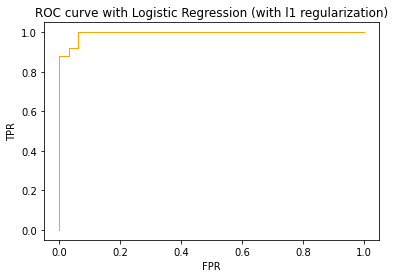

In [ ]:
log_reg = LogisticRegression(C=(1/3), penalty = 'l1', solver = 'liblinear')
poly = PolynomialFeatures((1,2))
poly_train = poly.fit_transform(features_scaled)
log_reg.fit(poly_train, target)
poly_test = poly.fit_transform(features_scaled_test)
predictions = log_reg.predict(poly_test)


print_4_metrics(target_test, predictions)

score=log_reg.predict_proba(poly_test)[:,1]


fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
print()
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression (with l1 regularization)")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)
print()


In [ ]:
import math


score=log_reg.predict_proba(poly_train)[:,1]


fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target,score)

for x in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
  threshold = x
  print("----Threshold: " + str(threshold))
  predictions = np.where(log_reg.predict_proba(poly_train)[:,1] > threshold, 1, 0)
  # print((1-fpr_log_reg[x])*tpr_log_reg[x])
  print_4_metrics(predictions, target)

----Threshold: 0.1
Accuracy:    0.800000
Precision:   1.000000
Recall:      0.697674
F1 Score:    0.821918
----Threshold: 0.15
Accuracy:    0.861538
Precision:   1.000000
Recall:      0.769231
F1 Score:    0.869565
----Threshold: 0.2
Accuracy:    0.892308
Precision:   1.000000
Recall:      0.810811
F1 Score:    0.895522
----Threshold: 0.25
Accuracy:    0.907692
Precision:   1.000000
Recall:      0.833333
F1 Score:    0.909091
----Threshold: 0.3
Accuracy:    0.938462
Precision:   1.000000
Recall:      0.882353
F1 Score:    0.937500
----Threshold: 0.35
Accuracy:    0.946154
Precision:   1.000000
Recall:      0.895522
F1 Score:    0.944882
----Threshold: 0.4
Accuracy:    0.969231
Precision:   1.000000
Recall:      0.937500
F1 Score:    0.967742
----Threshold: 0.45
Accuracy:    0.984615
Precision:   1.000000
Recall:      0.967742
F1 Score:    0.983607
----Threshold: 0.5
Accuracy:    0.992308
Precision:   1.000000
Recall:      0.983607
F1 Score:    0.991736
----Threshold: 0.55
Accuracy:    

In [ ]:
import numpy as np
threshold = 0.625
predictions = np.where(log_reg.predict_proba(poly_test)[:,1] > threshold, 1, 0)
print_4_metrics(target_test, predictions)

Accuracy:    0.947368
Precision:   0.958333
Recall:      0.920000
F1 Score:    0.938776


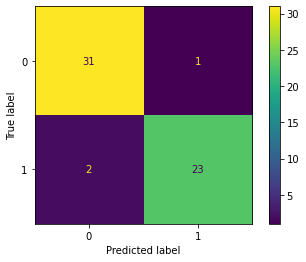

In [ ]:
log_reg = LogisticRegression(C=(1/0.1), penalty = 'l1', solver = 'liblinear')
log_reg.fit(features_scaled, target)
prediction = log_reg.predict(features_scaled_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, prediction), display_labels=log_reg.classes_)
disp.plot()



In [ ]:

coef = log_reg.coef_.reshape(42,1)
dataframe = pd.DataFrame(coef, columns = ["Beta Values"])
dataframe["Feature"] = lst
dataframe



,Beta Values,Feature
0,0.325236,"Recipientgender {1,0}"
1,-0.677641,"Stemcellsource {1,0}"
2,0.000000,Donorage numeric
3,1.005144,"Donorage35 {0,1}"
4,0.015412,"IIIV {1,0}"
5,-0.269588,"Gendermatch {0,1}"
6,0.499207,"RecipientRh {1,0}"
7,-2.032519,"ABOmatch {0,1}"
8,0.000000,"CMVstatus {3,2,1,0}"
9,-0.003392,"DonorCMV {1,0}"


# **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
crit = ["gini", "entropy"]
for criteria in crit:
  print(criteria)
  decision_tree = DecisionTreeClassifier(criterion=criteria)
  print(cross_val_score(decision_tree, features_scaled, target, cv = 10).mean())

#entropy is better

gini
0.9230769230769231
entropy
0.9384615384615385


Accuracy:    0.894737
Precision:   1.000000
Recall:      0.760000
F1 Score:    0.863636
AUC of ROC:
 0.88


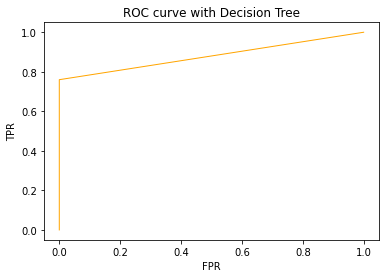

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(features_scaled, target)
target_predict = decision_tree.predict(features_scaled_test)
print_4_metrics(target_test,target_predict)
score=decision_tree.predict_proba(features_scaled_test)[:,1]

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Decision Tree")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)

In [ ]:
crit = list(range(1,30))
for criteria in crit:
  print(criteria)
  decision_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=criteria)
  print(cross_val_score(decision_tree, features_scaled, target, cv = 10).mean())
  #best min_samples_leaf=5

1
0.9307692307692307
2
0.9384615384615385
3
0.9307692307692307
4
0.9538461538461538
5
0.9538461538461538
6
0.953846153846154
7
0.953846153846154
8
0.9384615384615385
9
0.9384615384615385
10
0.9384615384615385
11
0.9384615384615385
12
0.9384615384615385
13
0.9384615384615385
14
0.9384615384615385
15
0.9384615384615385
16
0.9384615384615385
17
0.9384615384615385
18
0.9384615384615385
19
0.9384615384615385
20
0.9384615384615385
21
0.9384615384615385
22
0.9384615384615385
23
0.9384615384615385
24
0.9384615384615385
25
0.9384615384615385
26
0.9384615384615385
27
0.9384615384615385
28
0.9384615384615385
29
0.9384615384615385


Accuracy:    0.912281
Precision:   0.916667
Recall:      0.880000
F1 Score:    0.897959
AUC of ROC:
 0.92875


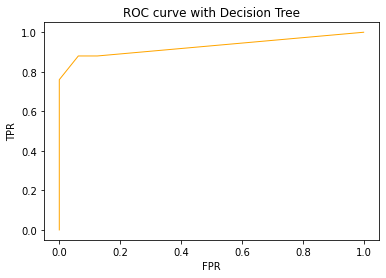

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5)
decision_tree.fit(features_scaled, target)
target_predict = decision_tree.predict(features_scaled_test)
print_4_metrics(target_test,target_predict)
score=decision_tree.predict_proba(features_scaled_test)[:,1]

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Decision Tree")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)

In [ ]:
crit = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4]
# crit = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for criteria in crit:
  print(criteria)
  decision_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, min_impurity_decrease = criteria)
  print(cross_val_score(decision_tree, features_scaled, target, cv = 10).mean())

# min_impurity_decrease = 0.0

0.0
0.9538461538461538
0.1
0.923076923076923
0.2
0.9384615384615385
0.3
0.9384615384615385
0.4
0.9384615384615385
0.5
0.9384615384615385
0.6
0.9384615384615385
0.7
0.9384615384615385
0.8
0.5615384615384615
0.9
0.5384615384615384
1
0.5384615384615384
2
0.5384615384615384
3
0.5384615384615384
4
0.5384615384615384


Accuracy:    0.912281
Precision:   0.916667
Recall:      0.880000
F1 Score:    0.897959
AUC of ROC:
 0.92875


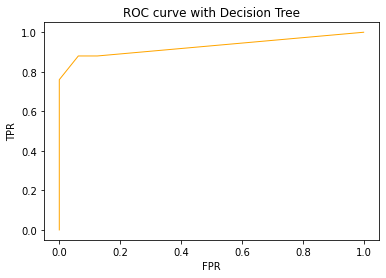

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5, min_impurity_decrease = 0.0)
decision_tree.fit(features_scaled, target)
target_predict = decision_tree.predict(features_scaled_test)
print_4_metrics(target_test,target_predict)
score=decision_tree.predict_proba(features_scaled_test)[:,1]

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Decision Tree")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)

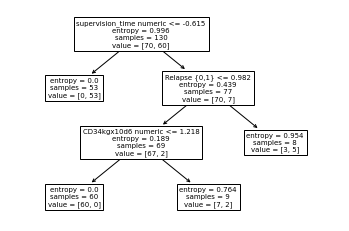

<Figure size 36000x36000 with 0 Axes>

In [ ]:
from sklearn import tree
tree.plot_tree(decision_tree, feature_names = lst)
plt.figure(figsize=(500,500))
plt.show()

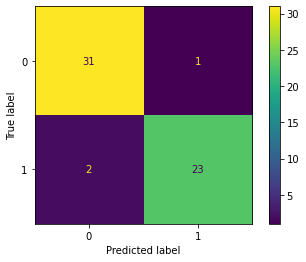

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(target_test, prediction)
cf = ConfusionMatrixDisplay(cf)
cf.plot()

# **4. Support Vector Machine**

**4.1 Implement SVM**


---



Accuracy:    0.842105
Precision:   0.766667
Recall:      0.920000
F1 Score:    0.836364
SVM Performance Results:

AUC of ROC:  0.9550000000000001


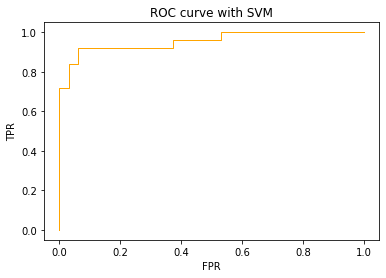

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
svm=SVC(probability=True)
svm.fit(features_scaled,target)
prediction=svm.predict(features_scaled_test)
score=svm.predict_proba(features_scaled_test)[:,1]

print_4_metrics(target_test,prediction)

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
print("SVM Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC: ', aucroc)



**4.2 Selecting Optimal Kernel**


---



In [ ]:
kernel_list=['linear', 'poly','sigmoid']
for kernel in kernel_list:
  print("for kernel:"+kernel)
  svm=SVC(kernel = kernel, probability=True)
  svm.fit(features_scaled,target)
  prediction=svm.predict(features_scaled_test)
  score=svm.predict_proba(features_scaled_test)[:,1]
  print('Accuracy:'+ str(cross_val_score(svm, features_scaled, target, cv = 10, scoring = 'accuracy').mean()))
  print("")

#linear kernel is the best

for kernel:linear
Accuracy:0.9307692307692308

for kernel:poly
Accuracy:0.6538461538461539

for kernel:sigmoid
Accuracy:0.8692307692307694



**4.3 Selecting Optimal Lambda**


---


In [ ]:
lam1=[0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1,2,3,4]
for lam in lam1:
  print("for C:"+str(lam))
  svm=SVC(kernel = "linear", probability=True, C = lam)
  svm.fit(features_scaled,target)
  prediction=svm.predict(features_scaled_test)
  score=svm.predict_proba(features_scaled_test)[:,1]
  print('Accuracy:'+ str(cross_val_score(svm, features_scaled, target, cv = 10, scoring = 'accuracy').mean()))
  print("")

# lam = 1/0.5=2

for C:0.1
Accuracy:0.8615384615384617

for C:0.2
Accuracy:0.9076923076923078

for C:0.3
Accuracy:0.9384615384615385

for C:0.5
Accuracy:0.9461538461538461

for C:0.6
Accuracy:0.9384615384615385

for C:0.7
Accuracy:0.9384615384615385

for C:0.8
Accuracy:0.9384615384615385

for C:0.9
Accuracy:0.9307692307692308

for C:1
Accuracy:0.9307692307692308

for C:2
Accuracy:0.9307692307692308

for C:3
Accuracy:0.9307692307692308

for C:4
Accuracy:0.9307692307692308



**4.4 Final Performance**

---



for lambda of 2 and linear kernel:
Accuracy:    0.912281
Precision:   0.884615
Recall:      0.920000
F1 Score:    0.901961
SVM Performance Results:
AUC of ROC:
 0.9762500000000001



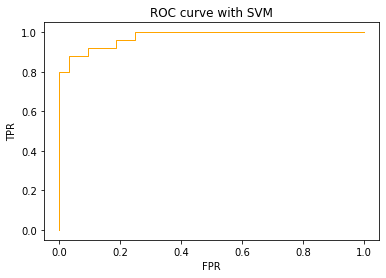

In [ ]:
print("for lambda of 2 "+"and linear kernel:")
svm=SVC(kernel = "linear", probability=True, C = 0.5)
svm.fit(features_scaled,target)
prediction=svm.predict(features_scaled_test)
score=svm.predict_proba(features_scaled_test)[:,1]
print_4_metrics(target_test,prediction)

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target_test,score)
print("SVM Performance Results:")
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC:\n', aucroc)
print()

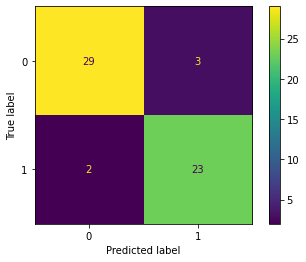

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(target_test, prediction)
cf = ConfusionMatrixDisplay(cf)
cf.plot()

# **5. Deep Learning - Convolutional Neural Network**

In [ ]:
import os
from PIL import Image, ImageFile
target = []
import numpy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
entries = os.listdir("/content/drive/MyDrive/Leukemia/Original/Benign")
benign_lst = []

for entry in entries:
    img = Image.open('/content/drive/MyDrive/Leukemia/Original/Benign/' + entry)
    img = numpy.asarray(img)
    benign_lst.append(img)
    target.append(0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
entries = os.listdir("/content/drive/MyDrive/Leukemia/Original/Early")
early_lst = []

for entry in entries:
    img = Image.open('/content/drive/MyDrive/Leukemia/Original/Early/' + entry)
    img = numpy.asarray(img)
    benign_lst.append(img)
    target.append(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
entries = os.listdir("/content/drive/MyDrive/Leukemia/Original/Pre")
pre_lst = []

for entry in entries:
    img = Image.open('/content/drive/MyDrive/Leukemia/Original/Pre/' + entry)
    img = numpy.asarray(img)
    benign_lst.append(img)
    target.append(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
entries = os.listdir("/content/drive/MyDrive/Leukemia/Original/Pro")
pro_lst = []

for entry in entries:
    img = Image.open('/content/drive/MyDrive/Leukemia/Original/Pro/' + entry)
    img = numpy.asarray(img)
    benign_lst.append(img)
    target.append(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = benign_lst + early_lst + pre_lst + pro_lst
X = numpy.array(X)

In [ ]:
target = numpy.array(target)

In [ ]:
X = X.reshape(3256, 224*224*3)

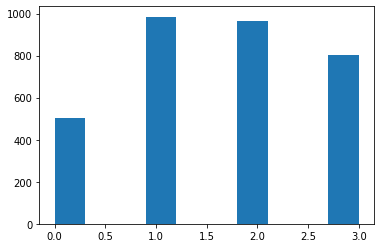

In [ ]:
plt.hist(target, bins = 10)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=10)
X_resampled, y_resampled = ros.fit_resample(X, target)

In [ ]:
X = X_resampled.reshape(3940, 224, 224, 3)

In [ ]:
target = y_resampled

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from keras.regularizers import l1

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 5, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(224,224,3), kernel_regularizer  = l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 5, kernel_size=(5,5),padding="same",activation ="relu", kernel_regularizer  = l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=5,kernel_size=(7,7),padding="same",activation="relu", kernel_regularizer  = l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation="relu", kernel_regularizer  = l1(0.002)))
model.add(Dense(50,activation="relu", kernel_regularizer  = l1(0.002)))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu", kernel_regularizer  = l1(0.002)))
model.add(Dense(50,activation="relu", kernel_regularizer  = l1(0.002)))
model.add(Dense(4, activation = "softmax", kernel_regularizer  = l1(0.002)))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 30)
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.config.run_functions_eagerly(True)
enc = OneHotEncoder(handle_unknown='ignore')
y_train = y_train.reshape(-1,1)
enc.fit(y_train)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
y_train = enc.transform(y_train).toarray()


In [ ]:
y_test = y_test.reshape(-1,1)
enc.fit(y_test)
y_test = enc.transform(y_test).toarray()

In [ ]:
y_val = y_val.reshape(-1,1)
enc.fit(y_val)
y_val = enc.transform(y_val).toarray()

In [ ]:
X_train = numpy.array(X_train)
X_test = numpy.array(X_test)
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


79/79 [==============================] - 4s 46ms/step - loss: 9.0184 - accuracy: 0.4161 - val_loss: 5.6514 - val_accuracy: 0.5975
Epoch 2/25
79/79 [==============================] - 3s 43ms/step - loss: 5.1040 - accuracy: 0.6589 - val_loss: 4.6929 - val_accuracy: 0.7401
Epoch 3/25
79/79 [==============================] - 3s 43ms/step - loss: 4.4319 - accuracy: 0.7307 - val_loss: 4.1986 - val_accuracy: 0.7258
Epoch 4/25
79/79 [==============================] - 3s 40ms/step - loss: 4.1051 - accuracy: 0.7410 - val_loss: 4.0266 - val_accuracy: 0.7147
Epoch 5/25
79/79 [==============================] - 3s 40ms/step - loss: 3.7065 - accuracy: 0.8056 - val_loss: 3.5730 - val_accuracy: 0.8304
Epoch 6/25
79/79 [==============================] - 3s 40ms/step - loss: 3.4620 - accuracy: 0.8152 - val_loss: 3.2950 - val_accuracy: 0.8653
Epoch 7/25
79/79 [==============================] - 3s 44ms/step - loss: 3.1900 - accuracy: 0.8417 - val_loss: 3.0834 - val_accuracy: 0.8685
Epoch 8/25
79/79 [======

In [ ]:
prob = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
pred = tf.argmax(prob, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

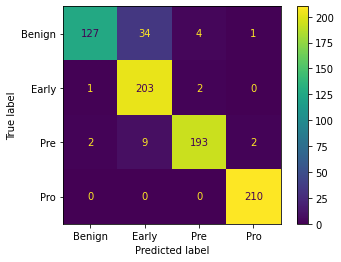

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 30)
cf = confusion_matrix(y_test, pred)
cf = ConfusionMatrixDisplay(cf, display_labels = ["Benign", "Early", "Pre", "Pro"])
cf.plot()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9302030456852792